LAB: Visualización de datos usando Matplotlib
==========================================

In [135]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import datetime as dt
%matplotlib inline

In [102]:
DataFrame = pd.read_csv('indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')
DataFrame.loc[DataFrame['Region'] == 'africa','Region'] = "Africa"
DataFrame['Ano'] = pd.to_datetime(DataFrame['Ano'])
DataFrame['AnoUnico']= DataFrame[['Ano']].apply(lambda x: dt.datetime.strftime(x['Ano'], '%Y'), axis=1)
DataFramePoblacionSuma = DataFrame.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
DataFramePoblacionSumaPorcentaje = DataFramePoblacionSuma.copy()
SumaPorRegion = DataFramePoblacionSumaPorcentaje.sum(axis = 0, skipna = True) 

DataFrameSumaGastos = DataFrame.groupby(['Region','AnoUnico']).agg({'Gasto en salud (per capita)': np.mean}) 
#DataFramePoblacionSumaPorcentaje['Total'] = DataFramePoblacionSumaPorcentaje['Poblacion 0-14'] + DataFramePoblacionSumaPorcentaje['Poblacion 15-64'] +DataFramePoblacionSumaPorcentaje['Poblacion 65+']
#DataFramePoblacionSumaPorcentaje['Poblacion 0-14'] =  (DataFramePoblacionSumaPorcentaje['Poblacion 0-14'] * 100 /  SumaPorRegion['Poblacion 0-14'])
#DataFramePoblacionSumaPorcentaje['Poblacion 15-64'] =  (DataFramePoblacionSumaPorcentaje['Poblacion 15-64'] * 100 /  SumaPorRegion['Poblacion 15-64'])
#DataFramePoblacionSumaPorcentaje['Poblacion 65+'] =  (DataFramePoblacionSumaPorcentaje['Poblacion 65+'] * 100 /  SumaPorRegion['Poblacion 65+'])

                        Gasto en salud (per capita)
Region        AnoUnico                             
Africa        2000                        50.520000
              2001                        50.360000
              2002                        50.980000
              2003                        61.040000
              2004                        73.460000
Asia          2000                       182.100000
              2001                       169.800000
              2002                       169.612903
              2003                       196.129032
              2004                       215.580645
Europa        2000                      1143.454545
              2001                      1177.045455
              2002                      1359.477273
              2003                      1704.250000
              2004                      1975.931818
Las Americas  2000                       450.028571
              2001                       463.228571
            

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


Text(0, 0.5, 'Valor')

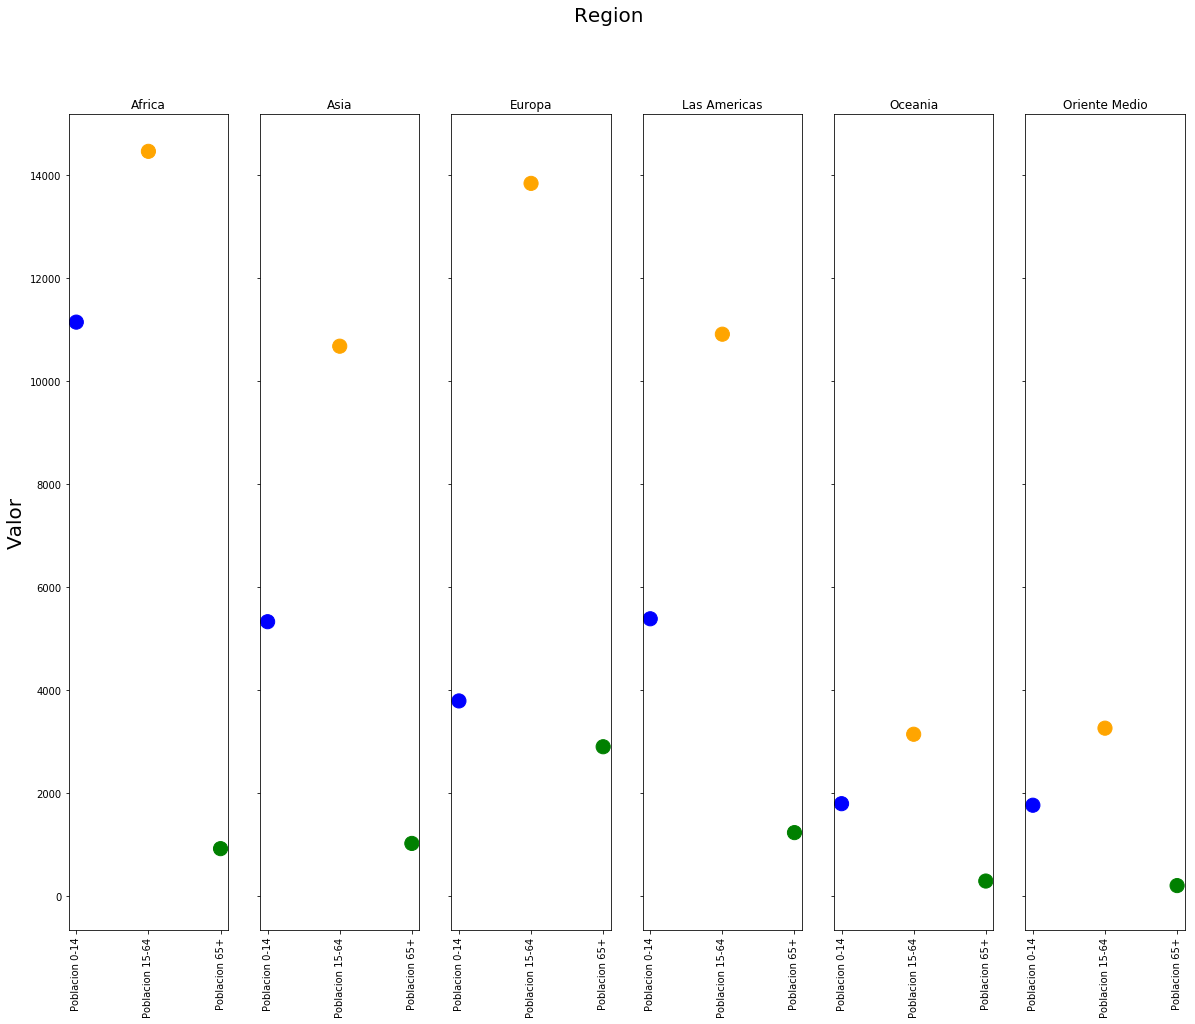

In [151]:
DataFrameGrap = DataFramePoblacionSumaPorcentaje.copy()
DataFrameGrap = DataFrameGrap[['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
indices = (DataFrameGrap.index.values)
contador = 0
my_colors = ['blue','orange','green']
fig, axs = plt.subplots(1, len(indices), figsize=(20, 15), sharey=True)
for indice in indices:
    DataFrameDeIndice = (DataFrameGrap.loc[indice,:])
    data = pd.Series.to_dict(DataFrameDeIndice)
    names = list(data.keys())
    values = list(data.values())
    axs[contador].scatter(names, values,[200,200,200],c=my_colors)
    axs[contador].set_xticklabels(names,rotation='vertical')
    axs[contador].title.set_text(indice)
    contador+=1
fig.suptitle('Region', fontsize=20)
axs[0].set_ylabel(ylabel='Valor',fontsize=20)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


[11136.2, 14452.699999999992, 911.7000000000003]
[5318.5999999999985, 10668.699999999999, 1013.0000000000001]
[3780.200000000001, 13830.599999999999, 2890.500000000002]
[5375.500000000002, 10901.799999999996, 1223.1]
[1784.8, 3133.1000000000004, 282.50000000000006]
[1754.7000000000003, 3251.1000000000004, 194.20000000000005]


Text(0, 0.5, 'Valor')

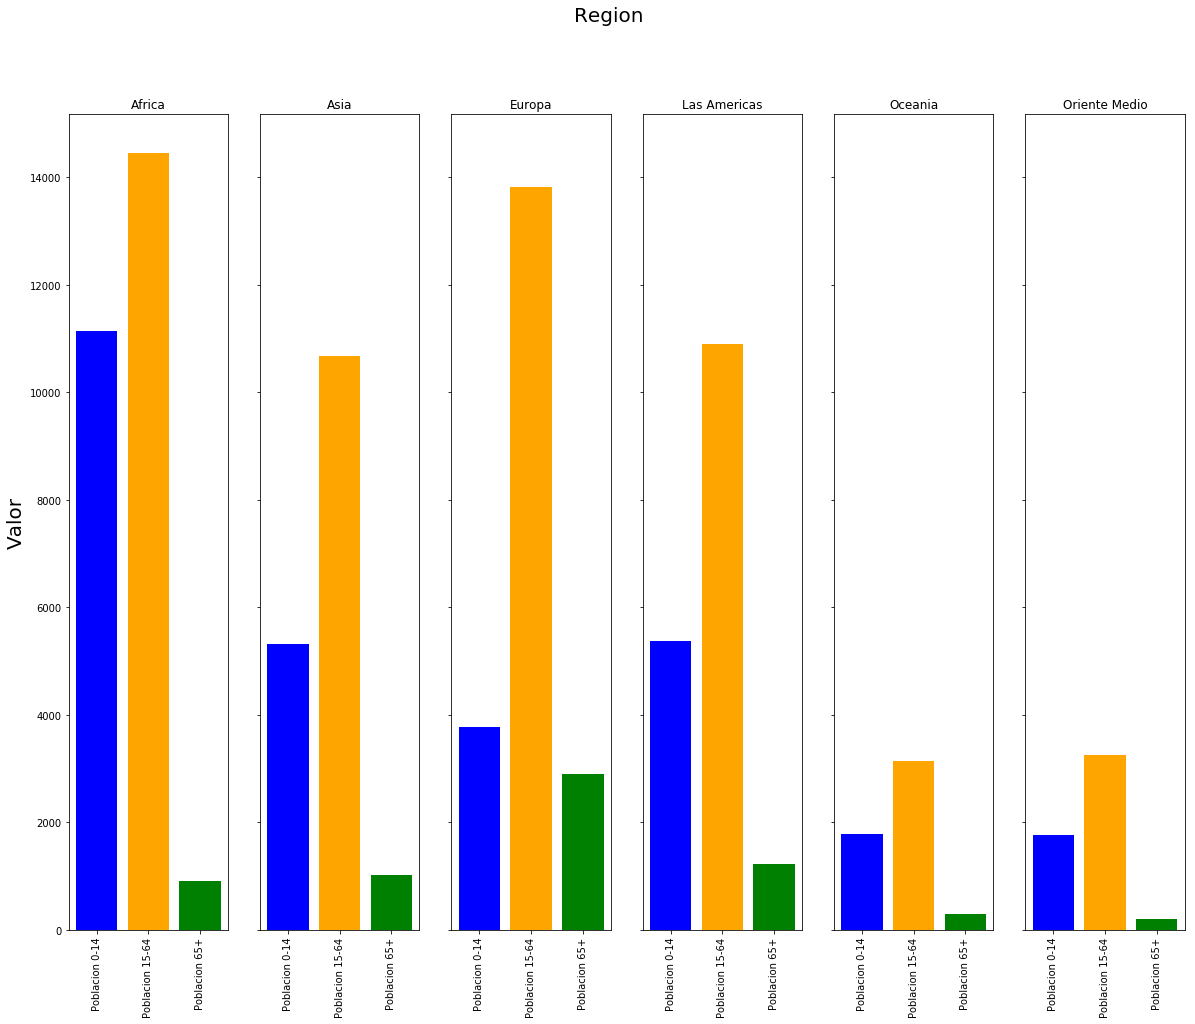

In [9]:
DataFrameGrap = DataFramePoblacionSumaPorcentaje.copy()
DataFrameGrap = DataFrameGrap[['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
indices = (DataFrameGrap.index.values)
contador = 0
my_colors = ['blue','orange','green']
fig, axs = plt.subplots(1, len(indices), figsize=(20, 15), sharey=True)
for indice in indices:
    DataFrameDeIndice = (DataFrameGrap.loc[indice,:])
    data = pd.Series.to_dict(DataFrameDeIndice)
    names = list(data.keys())
    values = list(data.values())
    axs[contador].bar(names, values,color=my_colors)
    axs[contador].set_xticklabels(names,rotation='vertical')
    axs[contador].title.set_text(indice)
    contador+=1
fig.suptitle('Region', fontsize=20)
axs[0].set_ylabel(ylabel='Valor',fontsize=20)

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

Text(0.5, 0.98, 'Region')

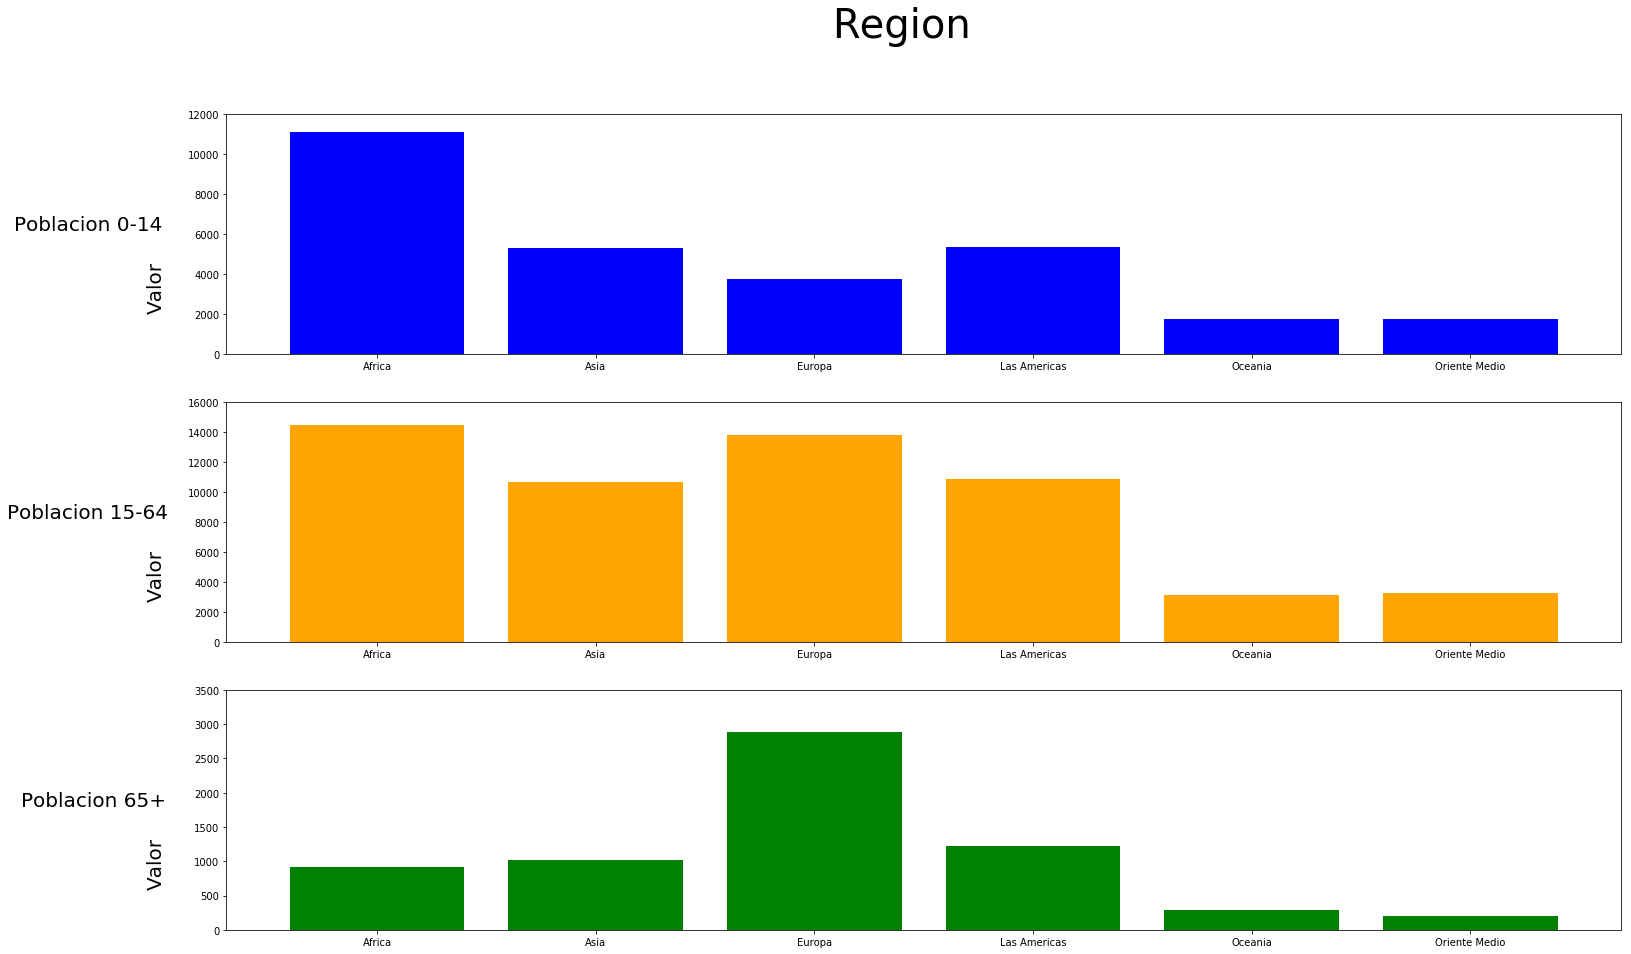

In [92]:
DataFrameGrap = DataFramePoblacionSumaPorcentaje.copy()
DataFrameGrap14 = DataFrameGrap[['Poblacion 0-14']]
DataFrameGrap64 = DataFrameGrap[['Poblacion 15-64']]
DataFrameGrap65 = DataFrameGrap[['Poblacion 65+']]

indices = (DataFrameGrap.index.values)
contador = 0
my_colors = ['blue','orange','green']
fig, axs = plt.subplots(3, 1, figsize=(25, 15), sharey=True)


def PlotGrafica(DataFrame,Indice,Posicion,Setcolor,yInferior,ySuperior):
    DataFrameGraficar=DataFrame.reset_index()
    data = pd.Series.to_dict(DataFrameGraficar[Indice])
    dataRegion = pd.Series.to_dict(DataFrameGraficar['Region'])
    names = list(dataRegion.values())
    values = list(data.values())
    ax1 = plt.subplot(Posicion)
    ax1.bar(names, values,color=Setcolor)
    ax1.set_xticklabels(names,rotation='horizontal')
    ax1.set_ylabel(ylabel=Indice,fontsize=20,rotation='horizontal',labelpad =100)
    ax1.set_ylim([yInferior, ySuperior])
    ax1.set_title('Valor',rotation='vertical',fontsize=20,x=-0.05, y=0.3)
PlotGrafica(DataFrameGrap14,'Poblacion 0-14',311,'Blue',0,12000)
PlotGrafica(DataFrameGrap64,'Poblacion 15-64',312,'Orange',0,16000)
PlotGrafica(DataFrameGrap65,'Poblacion 65+',313,'Green',0,3500)



fig.suptitle('Region', fontsize=40)

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

Text(0, 0.5, 'Prom.Gasto en Salud (per capita)')

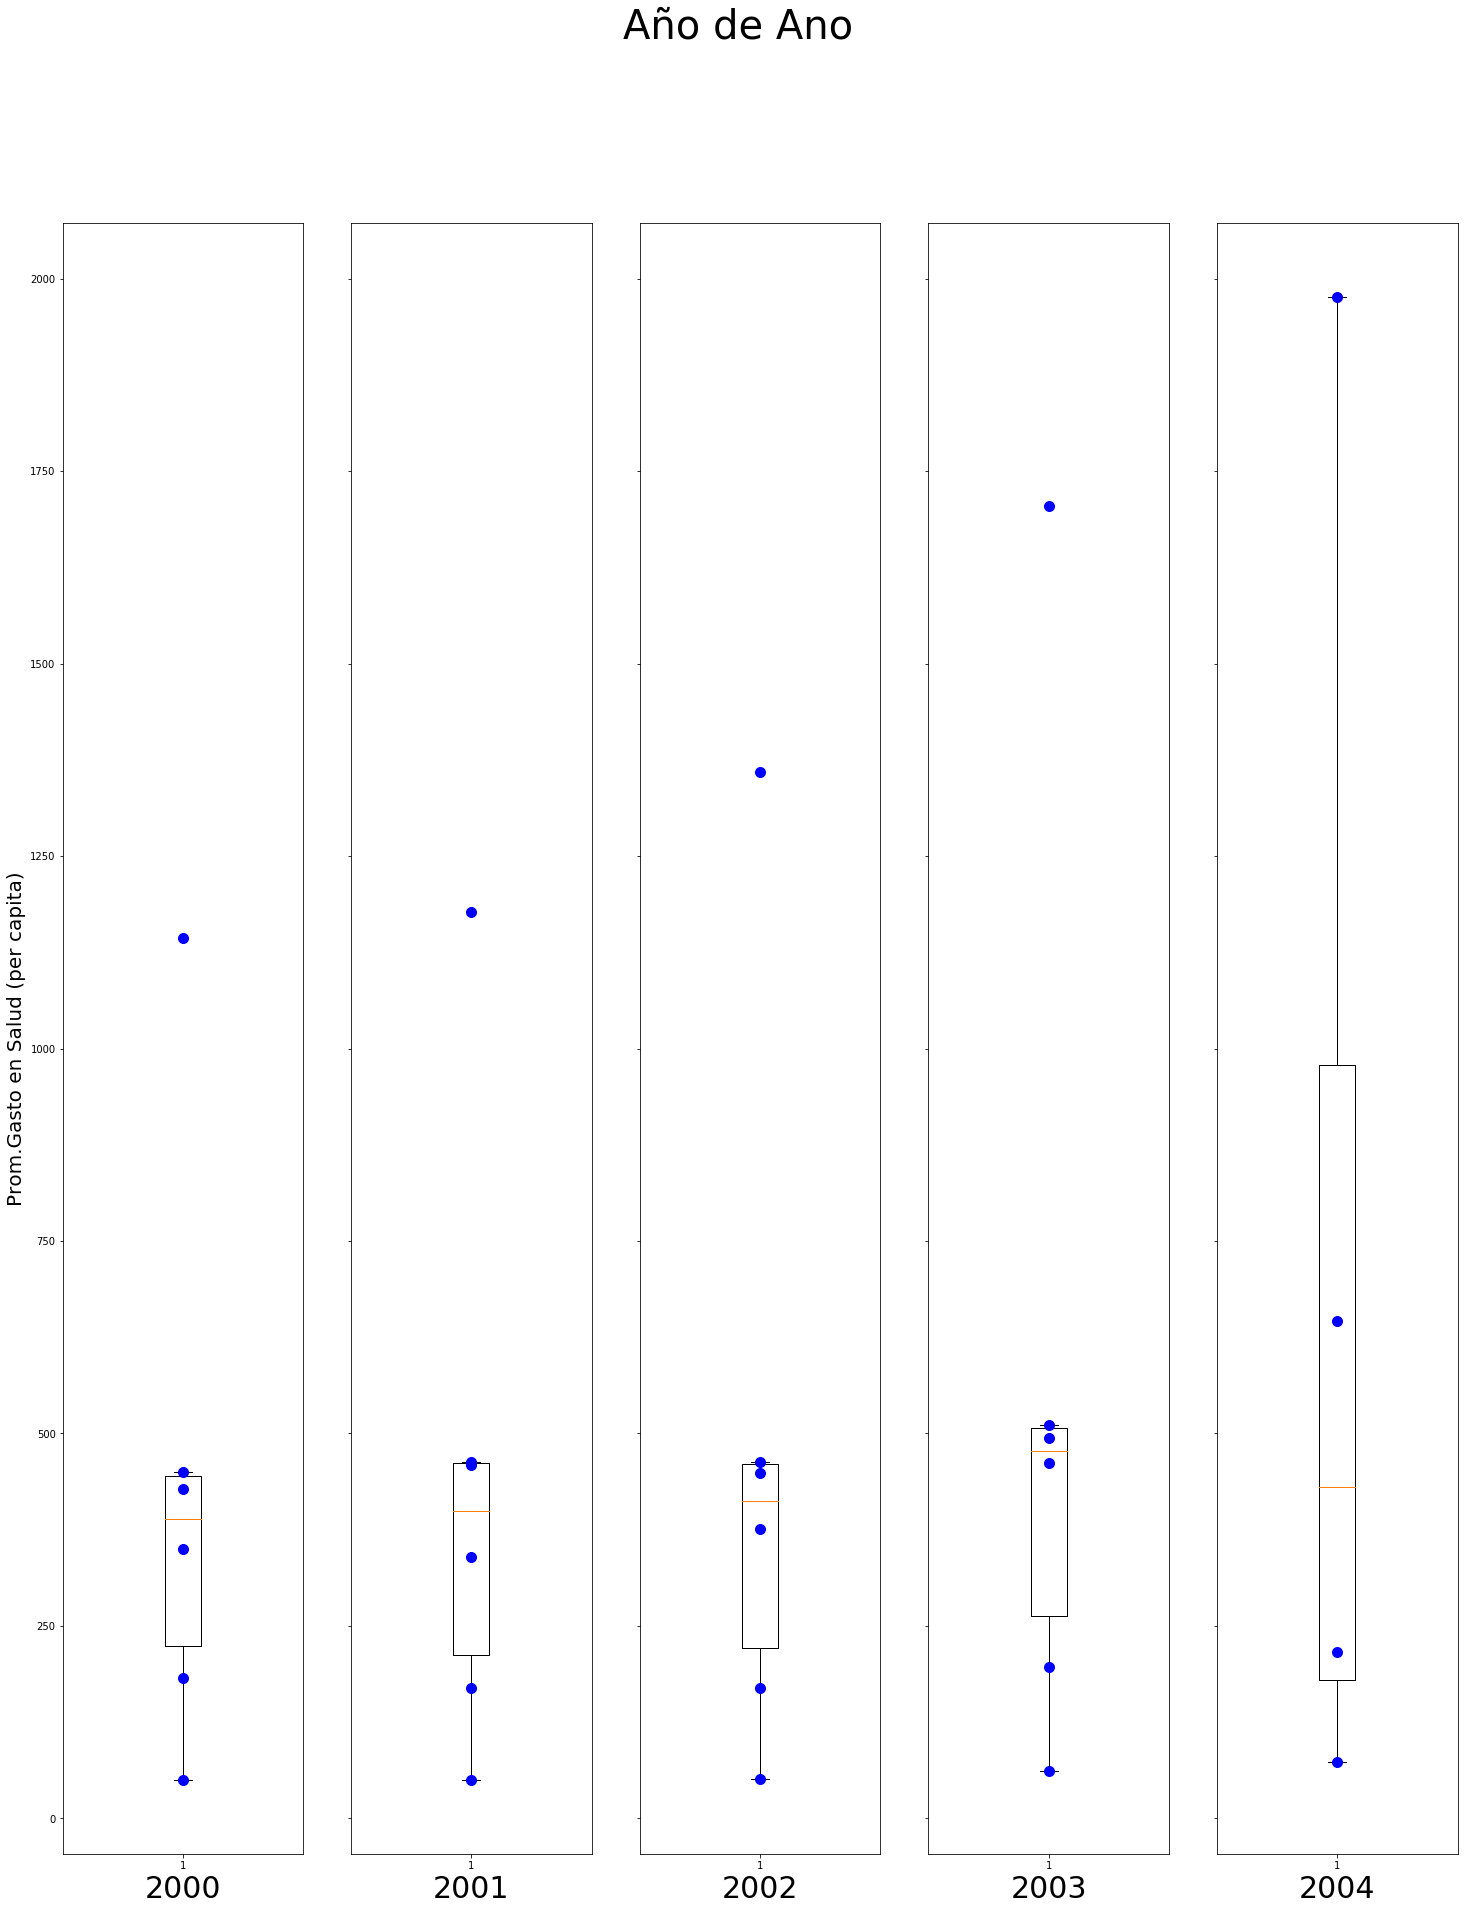

In [161]:
DataFrameGastosPerCapita = DataFrameSumaGastos.copy()
DataFrameGastosPerCapita = DataFrameGastosPerCapita.reset_index()
Years = (DataFrameGastosPerCapita['AnoUnico'].drop_duplicates())
Contador = 0
fig, axs = plt.subplots(1, len(Years),figsize=(25, 30), sharey=True)
for Year in Years:
    DataFramePerYear = DataFrameGastosPerCapita[DataFrameGastosPerCapita['AnoUnico']== Year]
    values = list(DataFramePerYear['Gasto en salud (per capita)'])
    axs[Contador].boxplot(values,0)
    axs[Contador].set_xlabel(Year,fontsize=30)
    for value in values:
        axs[Contador].plot(1 ,value, 'b.', marker="o",  markersize=10)
    Contador+=1
fig.suptitle('Año de Ano', fontsize=40)
axs[0].set_ylabel(ylabel='Prom.Gasto en Salud (per capita)',fontsize=20)

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

---